# RESTAURANT RECOMMENDATION

## IMPORTING LIBRARIES

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



### IMPORTING AND UNDERSTANDING THE  DATA :

In [98]:
data = pd.read_excel('data.xlsx')

data.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243
5,18352452,Lucky Cat Coffee & Kitchen,94,Jakarta,"Plaza Festival, South Parking, Jl. HR Rasuna S...","Plaza Festival, Kuningan","Plaza Festival, Kuningan, Jakarta",106.831748,-6.218932,"Cafe, Western",300000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,458
6,18386856,Onokabe,94,Tangerang,"Alam Sutera Town Center, Jl. Alam Utama, Serpo...","Alam Sutera Town Center, Serpong Utara","Alam Sutera Town Center, Serpong Utara, Tangerang",106.652688,-6.241792,Indonesian,300000,Indonesian Rupiah(IDR),No,No,3,3.7,Yellow,Good,155
7,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",250000,Indonesian Rupiah(IDR),No,No,3,4.0,Green,Very Good,1159
8,18391256,MONKS,94,Jakarta,"Komplek Graha Boulevard Timur, Summarecon Kela...",Kelapa Gading,"Kelapa Gading, Jakarta",106.911335,-6.163948,"Western, Asian, Cafe",250000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,259
9,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",200000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,1662


### STRUCTURE AND TYPE OF DATASET

In [99]:
print('SHAPE OF DATA :' , data.shape)

data.dtypes


SHAPE OF DATA : (9551, 19)


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

### CLEANING NAMES

In [100]:
data.columns = data.columns.str.replace(' ','_')

### MISSING VALUES IF ANY

In [101]:
data.isnull().sum(axis = 0)

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
dtype: int64

 CUISINE AND RESTAURANT_NAME COLUMNS CONTAIN MISSING VALUES

In [102]:
# FILLING MISSING VALUES

data['Cuisines'] = data['Cuisines'].fillna('others')
data['Restaurant_Name'] = data['Restaurant_Name'].fillna('others')

### DUPLICATE VALUES IF ANY

In [103]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

THERE ARE NO DUPLICATE VALUES IN THE DATA SET

### GEOGRAPHICAL DISTRIBUTION OF RESTAURANTS

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


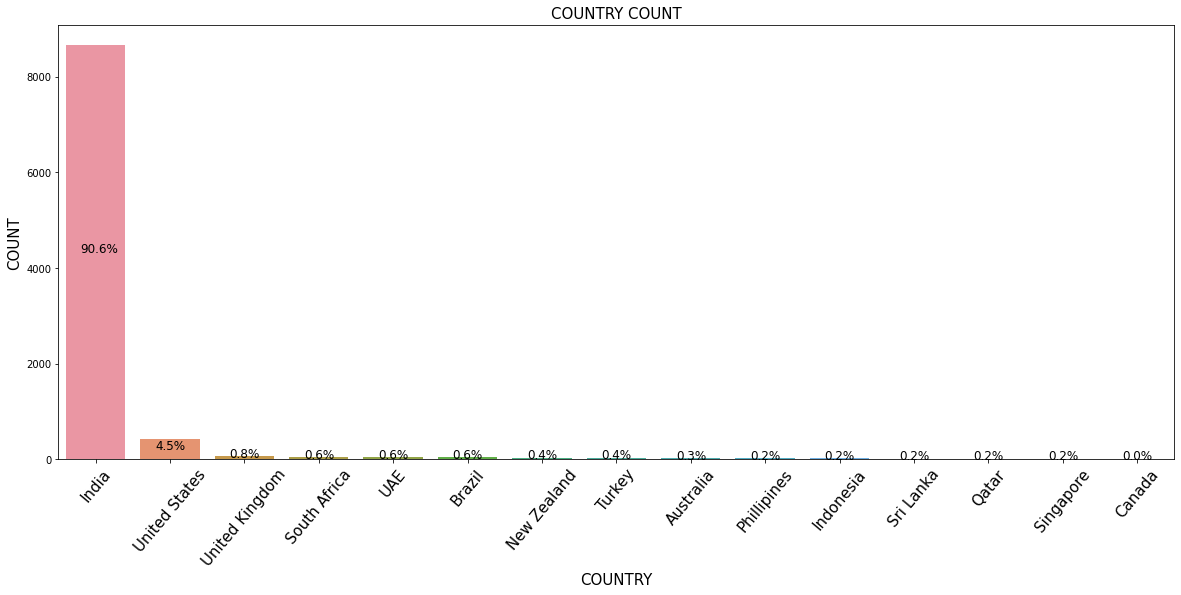

In [129]:
#### MERGING THE COUNTRY CODE AND DATA EXCEL FILES TO RETREIVE COUNTRY INFORMATION

country_code = pd.read_excel('Country-Code.xlsx')
country_code.columns = country_code.columns.str.replace(' ','_')
data = pd.merge(data,country_code, on = 'Country_Code')
data

# CREATING A DATAFRAME CONTAINING TOTAL COUNTRY COUNT AND THEIR RESPECTIVE PERCENTAGE

df = pd.DataFrame(data['Country'].value_counts()).rename({'Country':'frequency'}, axis= 1)

df['Percentage'] = (df['frequency']/df['frequency'].sum()*100).round(1)

df

# COUNT PLOT FOR COUNTRIES

plt.figure(figsize = (20,8))
sns.countplot('Country' , data = data , order = df.index)

for i in range(len(df)):
    plt.annotate(str(df['Percentage'][i]) +'%', xy = (i -0.2, int(df['frequency'][i]/2)),fontsize = 12)
    
plt.xticks(size = 15, rotation = 50)
plt.title('COUNTRY COUNT' , size = 15)
plt.xlabel('COUNTRY', size = 15)
plt.ylabel('COUNT', size = 15)

plt.show()

OVER 90% OF THE RESTAURANTS WORLDWIDE ARE LOCATED IN INDIA 

In [132]:
print('TOTAL NUMBER OF CITIES IN THE DATA SET :' , data['City'].nunique())
print()
print('CITIES WITH THE MAXIMUM NUMBER OF RESTAURANTS :') 
print(data['City'].value_counts().head())
print()
print('CITIES WITH THE MINIMUM NUMBER OF RESTAURANTS :') 
print(data['City'].value_counts().tail())



TOTAL NUMBER OF CITIES IN THE DATA SET : 141

CITIES WITH THE MAXIMUM NUMBER OF RESTAURANTS :
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

CITIES WITH THE MINIMUM NUMBER OF RESTAURANTS :
Lakes Entrance    1
Paynesville       1
Randburg          1
Princeton         1
Yorkton           1
Name: City, dtype: int64


NEW DELHI HAS THE HIGHEST NUMBER OF RESTAURANTS OUT OF ALL THE CITIES : 5473

PRINCETON, YORKTON ETC. HAVE THE LOWEST NUMBER OF RESTAURANTS : 1

## RATINGS DISTRIBUTION

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


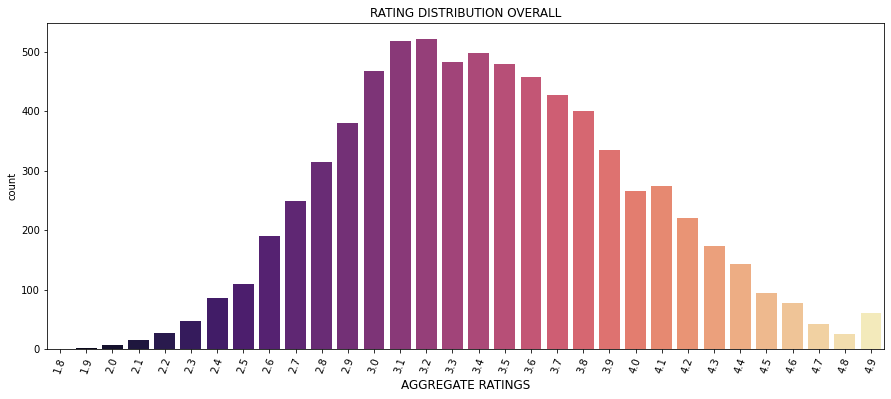

In [109]:
plt.figure(figsize=(15,6))
sns.countplot('Aggregate_rating' , data = data[data['Aggregate_rating'] != 0] , palette = 'magma')
plt.xticks(rotation = 70)
plt.xlabel('AGGREGATE RATINGS' , size = 12)
plt.title('RATING DISTRIBUTION OVERALL')
plt.show()

## NATIONAL PRESENCE

In [110]:
indian_cities = data.loc[data['Country'] == 'India' , ['City']]

print('INDIAN CITIES IN THE DATA SET :')
print('COUNT :' , indian_cities['City'].nunique())

indian_cities['City'].value_counts()




INDIAN CITIES IN THE DATA SET :
COUNT : 43


New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Lucknow           21
Ahmedabad         21
Bhubaneshwar      21
Guwahati          21
Amritsar          21
Puducherry        20
Nashik            20
Mumbai            20
Vizag             20
Coimbatore        20
Surat             20
Vadodara          20
Patna             20
Nagpur            20
Mangalore         20
Varanasi          20
Allahabad         20
Dehradun          20
Kochi             20
Aurangabad        20
Mysore            20
Goa               20
Agra              20
Kanpur            20
Jaipur            20
Bangalore         20
Pune              20
Bhopal            20
Chennai           20
Indore            20
Ludhiana          20
Ranchi            20
Kolkata           20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

THERE ARE 43 INDIAN CIIIES IN THE DATASET OUT OF WHICH NEW DELHI HAS THE HIGHEST NUMBER OF RESTAURANTS. CITIES LIKE PANCHKULA, MOHALI HAVE THE LEAST PRESENCE

C:\Users\sanch\AppData\Local\Temp\ipykernel_14556\3475535372.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_delhi = pd.Series()


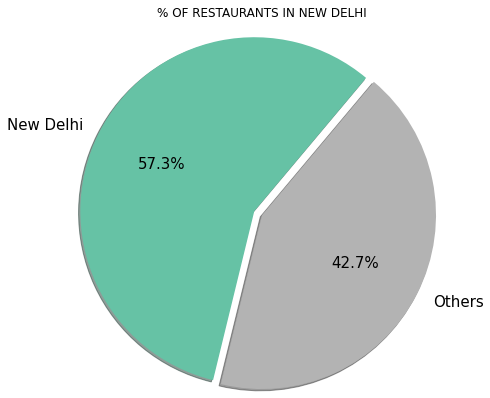

In [111]:
new_delhi = pd.Series()
new_delhi['New Delhi'] = len(data[data['City'] == 'New Delhi'])
new_delhi['Others'] = len(data[data['City'] != 'New Delhi'])



new_delhi.plot.pie(radius = 2,autopct = '%1.1f%%' , startangle = 50 ,textprops = {'size':15 }, 
                   explode= [0.1,0], shadow = True, cmap ='Set2')
plt.xticks(size = 12, rotation = 10)
plt.ylabel('')
plt.title('% OF RESTAURANTS IN NEW DELHI', pad = 90)
plt.show()

NEW DELHI CITY ALONE CONTAINS OVER 57% OF TOTAL RESTAURANTS IN THE DATASET

TOP 10 RESTAURANTS IN INIDA :


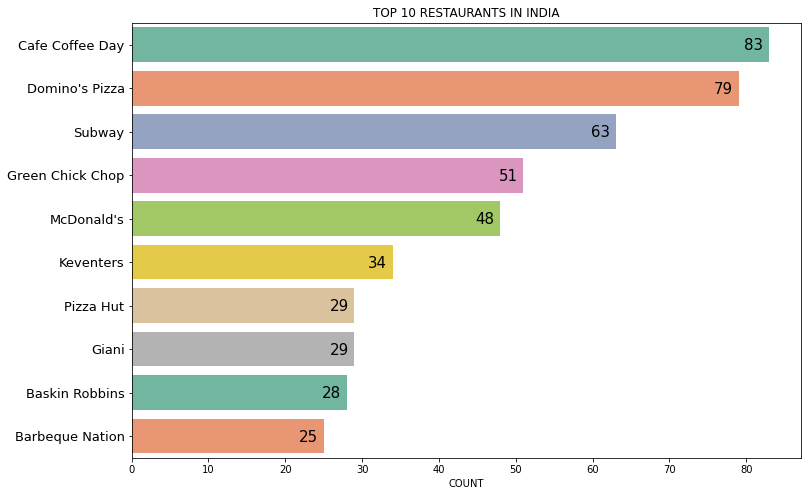

In [133]:
dfx = data.loc[data['Country'] == 'India' , ['Restaurant_Name']]

print('TOP 10 RESTAURANTS IN INIDA :')
top10_restaurants = dfx.Restaurant_Name.value_counts().head(10)
top10_restaurants

plt.figure(figsize = (12,8))
xy = sns.barplot(y = top10_restaurants.index, x = top10_restaurants.values, palette = 'Set2')


for i in range(10):
    value = top10_restaurants[i]
    xy.text(x = value - 2,y = i +0.125 , s = value, color='black', ha="center",fontsize = 15)



plt.title('TOP 10 RESTAURANTS IN INDIA')
plt.yticks(fontsize = 13)
plt.xlabel('COUNT')
plt.show()

CAFE COFFEE DAY RESTAURANT CHAIN HAS THE MOST OUTLETS ACROSS INDIA


### TABLE BOOKINGS

RESTAURANTS THAT DO NOT ALLOW TABLE BOOKINGS : 8393

RESTAURANTS THAT ALLOW TABLE BOOKINGS : 1158

RATIO OF RESTAURANTS THAT ALLOW TABLE BOOKING VS THAT DO NOT : 0.14

RESTAURANTS AND TABLE BOOKINGS


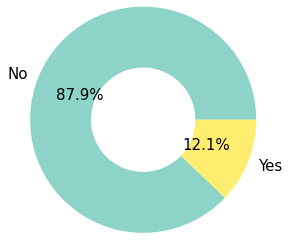

In [138]:
no = data[data['Has_Table_booking'] == 'No'].shape[0]

print('RESTAURANTS THAT DO NOT ALLOW TABLE BOOKINGS :', no)
print()

yes = data[data['Has_Table_booking'] == 'Yes'].shape[0]

print('RESTAURANTS THAT ALLOW TABLE BOOKINGS :' , yes)
print()

ratio = yes/no
print('RATIO OF RESTAURANTS THAT ALLOW TABLE BOOKING VS THAT DO NOT :', round(ratio,2))
print()

data['Has_Table_booking'].value_counts().plot.pie(autopct = '%0.1f%%', 
radius = 1.3, wedgeprops = {'width' : 0.7} ,cmap = 'Set3',textprops = {'size' : 15,} )
plt.ylabel('')
print('RESTAURANTS AND TABLE BOOKINGS')


### ONLINE DELIVERY

RESTAURANTS PROVIDING ONLINE DELIVERY : 2451

% OF RESTAURANTS PROVIDING ONLINE DELIVERY : 25.66

RESTAURANTS AND ONLINE BOOKINGS


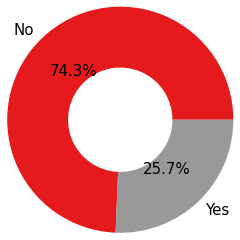

In [140]:
delivery = data[data['Has_Online_delivery'] == 'Yes'].shape[0]
print('RESTAURANTS PROVIDING ONLINE DELIVERY :' , delivery)

print()

print('% OF RESTAURANTS PROVIDING ONLINE DELIVERY :', round((delivery/data['Has_Online_delivery'].shape[0])*100,2))
print()

data['Has_Online_delivery'].value_counts().plot.pie(autopct = '%0.1f%%', 
radius = 1.3, wedgeprops = {'width' : 0.7} ,cmap = 'Set1',textprops = {'size' : 15} )
plt.ylabel('')
print('RESTAURANTS AND ONLINE BOOKINGS')

### VOTES FOR RESTAURANTS

TOTAL VOTES FOR RESTAURANTS THAT DELIVER : 517914
TOTAL VOTES FOR RESTAURANTS THAT DO NOT DELIVER : 980731
DIFFERENCE IN VOTES : 462817


C:\Users\sanch\AppData\Local\Temp\ipykernel_14556\458289009.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  delivery = pd.Series()


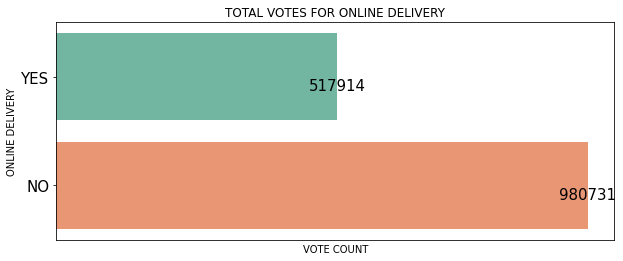

In [141]:
rest_that_deliver = data[data['Has_Online_delivery'] == 'Yes']


print('TOTAL VOTES FOR RESTAURANTS THAT DELIVER :' , rest_that_deliver['Votes'].sum())

rest_that_donot_deliver = data[data['Has_Online_delivery'] == 'No']


print('TOTAL VOTES FOR RESTAURANTS THAT DO NOT DELIVER :' , rest_that_donot_deliver['Votes'].sum())


print('DIFFERENCE IN VOTES :' , (rest_that_donot_deliver['Votes'].sum() - rest_that_deliver['Votes'].sum()))


delivery = pd.Series()

delivery['YES'] = rest_that_deliver['Votes'].sum()
delivery['NO'] =  rest_that_donot_deliver['Votes'].sum()




plt.figure(figsize=(10,4))
yz = sns.barplot(y = delivery.index, x = delivery.values, palette = 'Set2')
plt.tick_params( axis='x', bottom=False, labelbottom=False)
plt.yticks(size = 15)

for i in range(len(delivery)):
    value = delivery[i]
    yz.text(x = value - 2,y = i +0.125 , s = value, color='black', ha="center",fontsize = 15)

plt.ylabel('ONLINE DELIVERY')    
plt.xlabel('VOTE COUNT')
plt.title('TOTAL VOTES FOR ONLINE DELIVERY')
plt.show()



### TOP 10 CUISINES

TOP 10 CUISINES SERVED ACROSS CITIES :


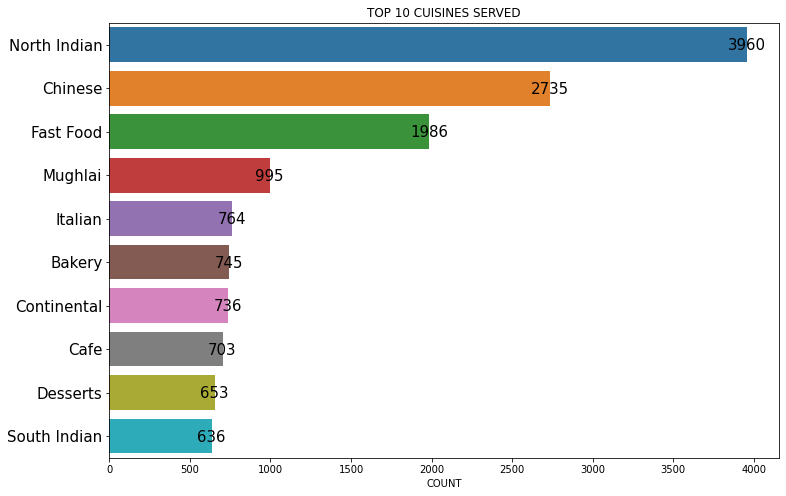

In [142]:
l = []
for i in data['Cuisines'].str.split(','):
    l.extend(i)
l


top10_cuisines = pd.Series([i.strip() for i in l]).value_counts().head(10)
print('TOP 10 CUISINES SERVED ACROSS CITIES :') 
top10_cuisines


plt.figure(figsize=(12,8))
sz = sns.barplot(x= top10_cuisines.values , y = top10_cuisines.index)



for i in range(10):
    value = top10_cuisines[i]
    sz.text(x = value - 2,y = i +0.125 , s = value, color='black', ha="center",fontsize = 15)
    
plt.title('TOP 10 CUISINES SERVED')
plt.yticks(size = 15)
plt.xlabel('COUNT')
plt.show()

NORTH INDIAN FOOD IS THE MOST SERVED CUISINE ACROSS ALL THE CITIES

### MAX AND MIN NUMBER OF CUISINES

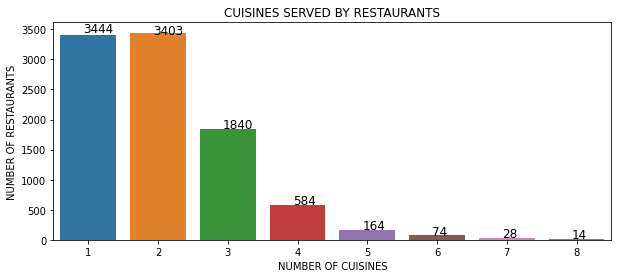

In [122]:
cuisines_count= data.Cuisines.str.split(',').apply(len)
cuisines_count = cuisines_count.value_counts()

plt.figure(figsize=(10,4))
sns.barplot(x = cuisines_count.index, y =cuisines_count.values)

for i in range(len(cuisines_count)):
    plt.annotate(cuisines_count.iloc[i], xy = (i-0.07,cuisines_count.iloc[i]+10), fontsize = 12)
plt.title('CUISINES SERVED BY RESTAURANTS')
plt.xlabel('NUMBER OF CUISINES')
plt.ylabel('NUMBER OF RESTAURANTS')
plt.show()


## CUISINES SERVED VS RATINGS

<function matplotlib.pyplot.show(close=None, block=None)>

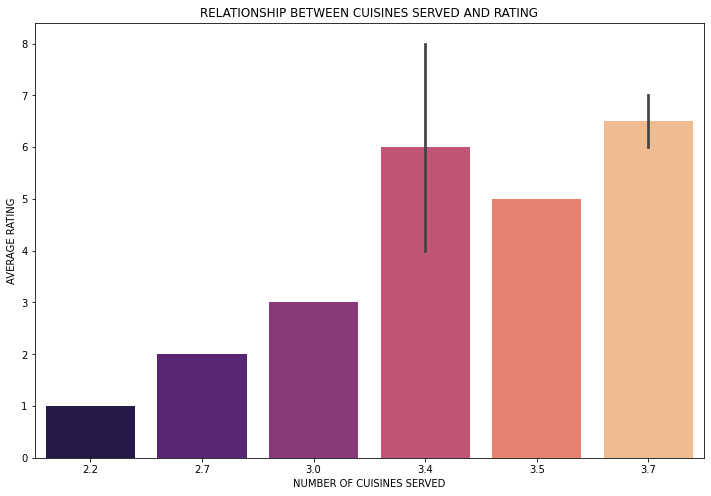

In [123]:
data_copy = data
data_copy['no_of_cuisines'] = data['Cuisines'].str.split(',').apply(len)



gh = data_copy.groupby(['no_of_cuisines'],as_index = False)['Aggregate_rating'].mean()
gh.columns = ['cuisines_served','average_rating']
gh['average_rating'] = gh['average_rating'].round(1)
gh

plt.figure(figsize = (12,8))
sns.barplot(x ='average_rating' , y = 'cuisines_served' , data = gh , palette = 'magma')
plt.xlabel('NUMBER OF CUISINES SERVED')
plt.ylabel('AVERAGE RATING')
plt.title('RELATIONSHIP BETWEEN CUISINES SERVED AND RATING')
plt.show

FROM THIS PLOT WE CAN CLEARLY SEE THAT NUMBER OF CUISINES SERVED IS AN IMPORTANT FACTOR WHICH DECIDES THE RATINGS OF RESTAURANTS

## COST VS OTHER VARIALBES

C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


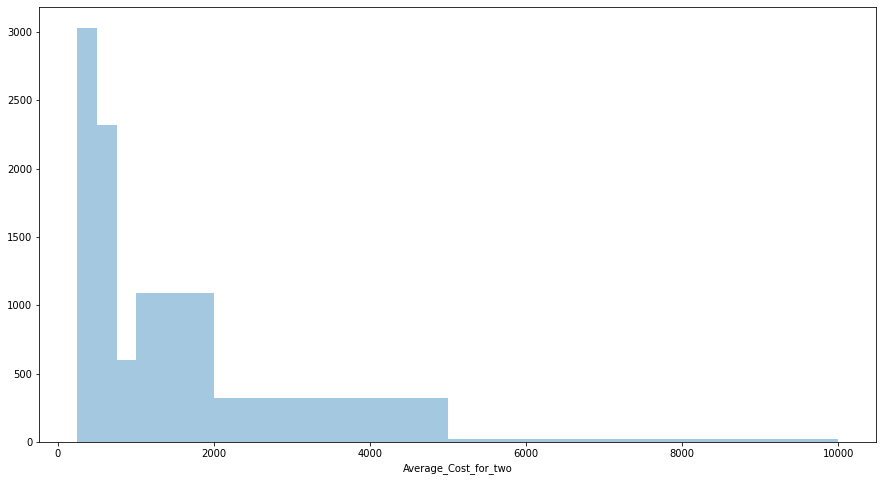

In [124]:
plt.figure(figsize = (15,8))
sns.distplot(data[data.Average_Cost_for_two != 0].Average_Cost_for_two , bins=[250,500,750,1000,2000,5000,10000],
             kde=False)
plt.show()


MOST OF THE DATA IS IN RANGE WHEN AVERAGE COST FOR TWO IS LESS THAN 2000

## FACTORS AFFECTING RATINGS OF RESTAURANTS

<function matplotlib.pyplot.show(close=None, block=None)>

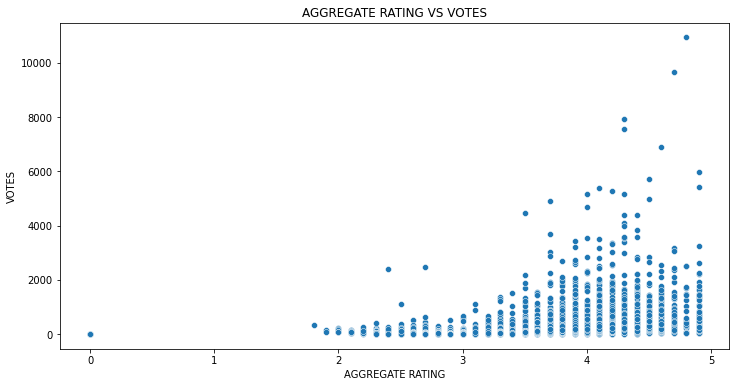

In [125]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x='Aggregate_rating',y='Votes', palette ='Set2')
plt.title('AGGREGATE RATING VS VOTES')
plt.xlabel('AGGREGATE RATING')
plt.ylabel('VOTES')
plt.show


NUMBER OF VOTES DOES NOT GIVE A CLEAR PICTURE ABOUT HOW IT MAY AFFECT THE RATING OF ANY PARTICULAR RESTAURANT AS
WE DO NOT SEE A SIGNIFICANT RISE IN NUMBER OF VOTES AS THE RATINGS INCREASE

<function matplotlib.pyplot.show(close=None, block=None)>

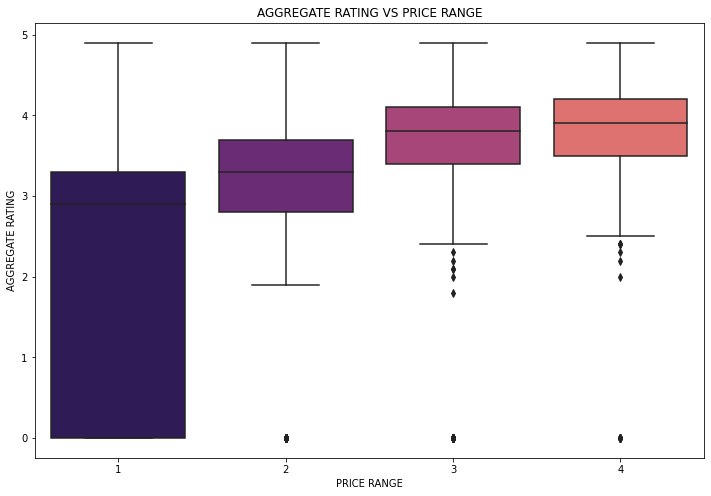

In [126]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Price_range', y ='Aggregate_rating', data = data,palette = sns.color_palette('magma', 5))
plt.title('AGGREGATE RATING VS PRICE RANGE')
plt.ylabel('AGGREGATE RATING')
plt.xlabel('PRICE RANGE')
plt.show


PRICE RANGE LESS THAN 2 CONTAINS MOST OF OUR DATA BUT WE CAN SEE THAT AS THE PRICE RANGE GOES UP SO DOES THE AGGREGATE RATING OF THE RESTAURANTS.
HENCE PRICE RANGE CAN BE A FACTOR DECIDING THE RESTAURANT RATING

In [127]:
data_copy.groupby('Has_Online_delivery', as_index = False)['Aggregate_rating'].mean().set_index('Has_Online_delivery')

,Aggregate_rating
Has_Online_delivery,
No,2.465296
Yes,3.248837


RESTAURANTS PROVIDING ONLINE DELIVERY HAVE BETTER AVERAGE RATING THAN THOSE WHO DON'T

In [128]:
data_copy.groupby('Has_Table_booking', as_index = False)['Aggregate_rating'].mean().set_index('Has_Table_booking')

,Aggregate_rating
Has_Table_booking,
No,2.559359
Yes,3.441969


RESTAURANTS PROVIDING TABLE BOOKING HAVE BETTER AVERAGE RATING THAN THOSE WHO DON'T

#### FROM THE ABOVE ANALYSIS WE CAN CONCLUDE THAT TABLE BOOKING, ONLINE DELIVERY, NO. OF CUISINES SERVED AND PRICE RANGE ARE IMPORTANT FACTORS THAT AFFECT THE RATING OF A RESTAURANT. WHEREAS FACTORS SUCH AS NUMBER OF VOTES AND AVERAGE COST FOR TWO DO NOT GIVE A CLEAR PICTURE OF HOW THEY AFFECT THE RATINGS